# FOXSI Optics Analysis CCD 
# X10-Shell module test 
## April 2018 - Berkeley
## @Milo

Here I present the HPD for data taken at NASA Marshall on March 2018. We used a new 10-shell module with a borrowed housing. Further testing is requiered in the future when the new housing arrived.

### Single HPD

In [1]:
import astropy.units as u
from foxsi_optics_calib.ccd.ccd import AndorCCDPsfImage
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_context('poster')

In [2]:
focal_length = 2 * u.m

f = '/Users/Kamilobu/Desktop/X10Test/data/kFOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_0mmZ.fits'
d = '/Users/Kamilobu/Desktop/X10Test/Dark1_FOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_+15mmZ.fits'

psf_img = AndorCCDPsfImage(f, d, focal_length)

Found 6 exposures. Averaging...


In [3]:
hpd, hpd_array, d = psf_img.hpd()

Text(40,0.25,'HPD = 22.82 arcsec')

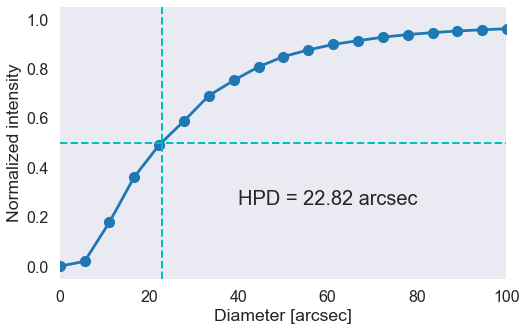

In [4]:
plt.figure(figsize=[8,5])
plt.plot(d,hpd_array,'o-')
plt.xlabel('Diameter [arcsec]')
plt.ylabel('Normalized intensity')
plt.axvline(hpd,color='c',linewidth=2, linestyle='dashed')
plt.axhline(0.5,color='c',linewidth=2, linestyle='dashed')
plt.xlim([0,100])
plt.text(40, 0.25,'HPD = '+"{:.2f}".format(hpd)+' arcsec',fontsize=20)

### Multiple HPD

In [5]:
import glob
import astropy.units as u
from foxsi_optics_calib.ccd.ccd import AndorCCDPsfImage
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_context('poster')


Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...


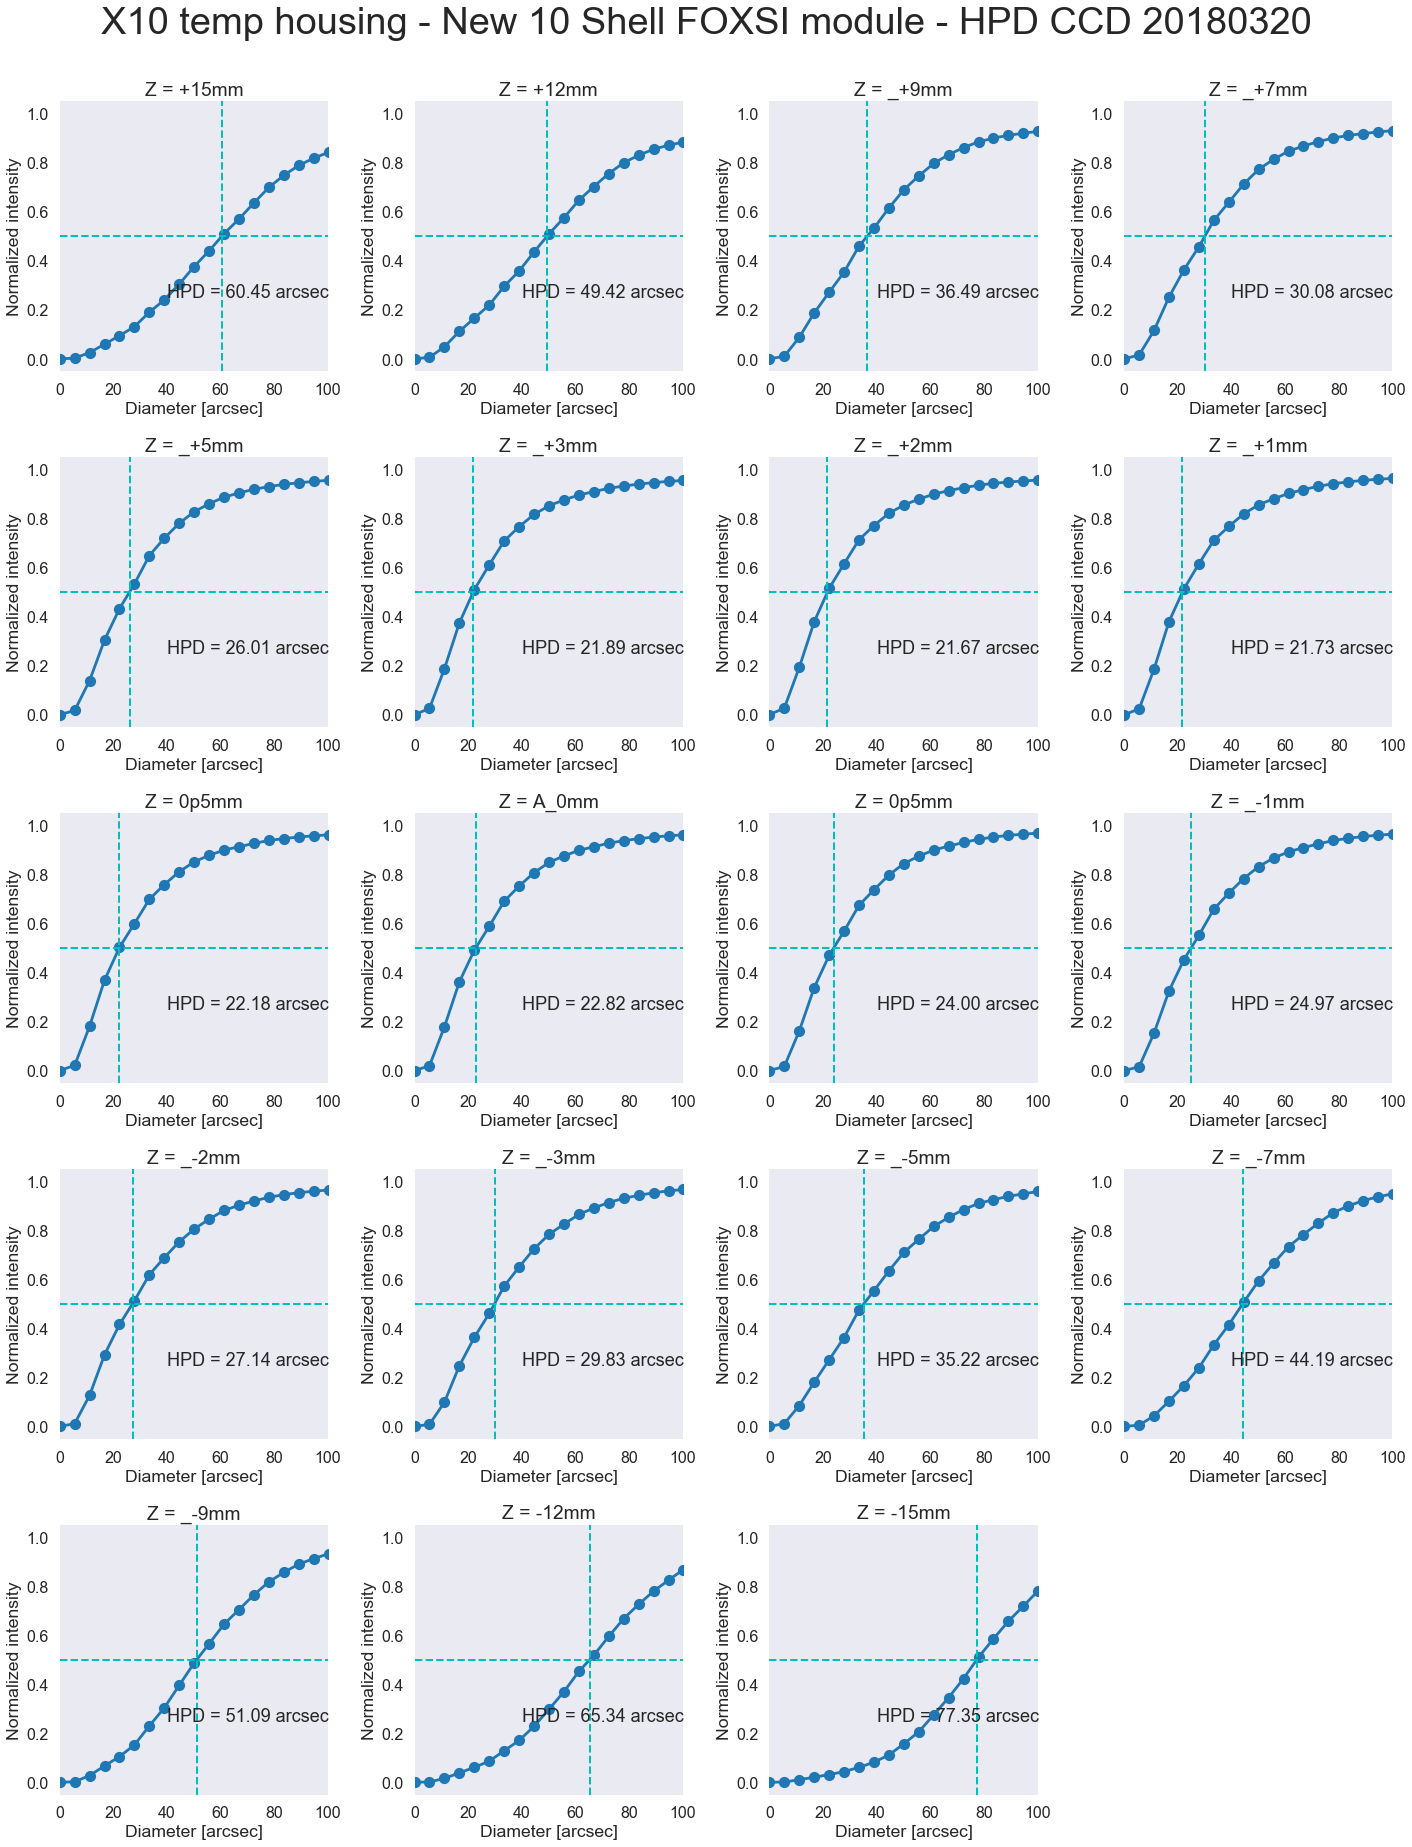

In [6]:
focal_length = 2 * u.m
data_dir = '/Users/Kamilobu/Desktop/X10Test/data/'
d = '/Users/Kamilobu/Desktop/X10Test/Dark1_FOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_+15mmZ.fits'
fig = plt.figure(figsize=(20,25))
plt.suptitle('X10 temp housing - New 10 Shell FOXSI module - HPD CCD 20180320', fontsize='38',y=1.03)
for i, f in enumerate(sorted(glob.glob(data_dir +'*.fits'))):
    psf_img = AndorCCDPsfImage(f, d, focal_length)
    hpd, hpd_array, D = psf_img.hpd()
    plt.subplot(5,4,i+1)
    plt.plot(D,hpd_array,'o-')
    plt.ylabel('Normalized intensity')
    plt.axvline(hpd,color='c',linewidth=2, linestyle='dashed')
    plt.axhline(0.5,color='c',linewidth=2, linestyle='dashed')
    plt.xlim([0,100])
    plt.text(40, 0.25,'HPD = '+"{:.2f}".format(hpd)+' arcsec',fontsize=18)
    plt.title('Z = '+f[-11:-6])
    plt.tight_layout()
    plt.xlabel('Diameter [arcsec]')
plt.show()

# Simply Image of the raw PSF

Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...
Found 6 exposures. Averaging...


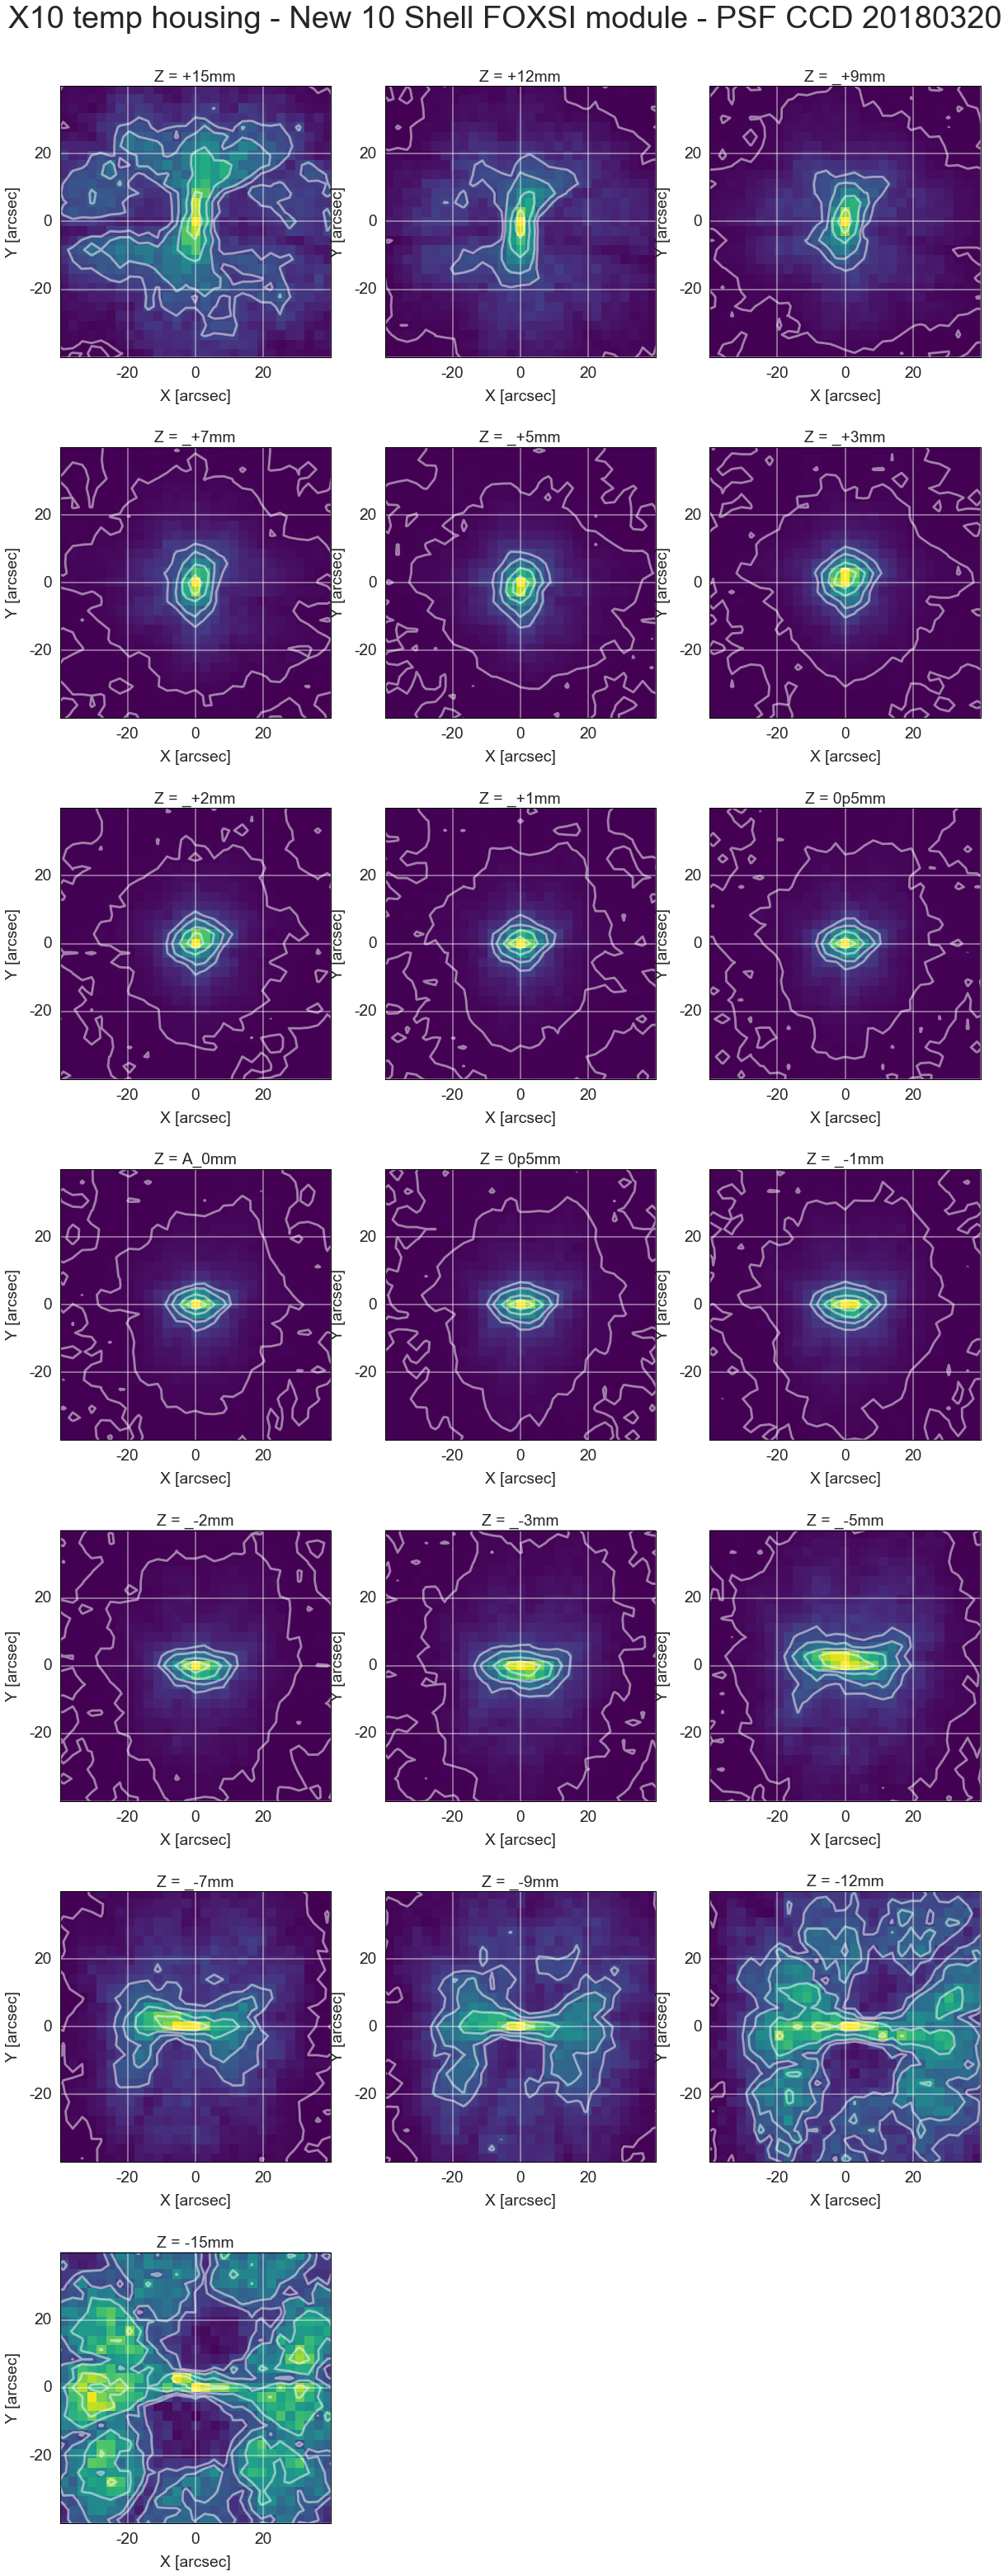

In [7]:
focal_length = 2 * u.m
data_dir = '/Users/Kamilobu/Desktop/X10Test/data/'
d = '/Users/Kamilobu/Desktop/X10Test/Dark1_FOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_+15mmZ.fits'
fig = plt.figure(figsize=(20,55))
plt.suptitle('X10 temp housing - New 10 Shell FOXSI module - PSF CCD 20180320', fontsize='38',y=0.9)
for i, f in enumerate(sorted(glob.glob(data_dir +'*.fits'))):
    psf_img = AndorCCDPsfImage(f, d, focal_length)
    axf = plt.subplot(7,3,i+1,projection=psf_img.wcs)
    psf_img.plot_image(ax=axf,title='Z = '+f[-11:-6])